<a href="https://colab.research.google.com/github/smomtahe/DiffusionModels_StableDiffusion_Text-to-Image/blob/main/Stable_Diffusion_Text_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers

In [ ]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.1 MB/s eta 0:00:00


In [ ]:
import mediapy as media
import random
import sys
import torch

from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )

pipe = pipe.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a photo of real state a fashion and modern with a table and a larg window can see sun andflowers and 1 bed and a table for studying
Seed:	995711249120531184


""

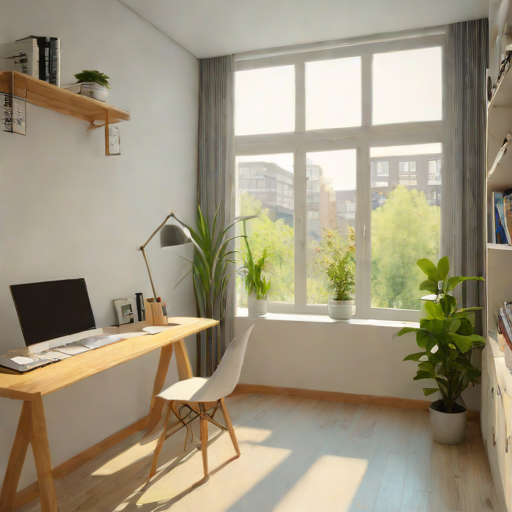

In [ ]:
prompt = "a photo of a fashion and modern with a table and a larg window can see sun andflowers and 1 bed and a table for studying"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a luxury room with large kitchen and sunshine view
Seed:	5309008261858307638


<ipython-input-68-250b2dd6304e>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font=font)


""

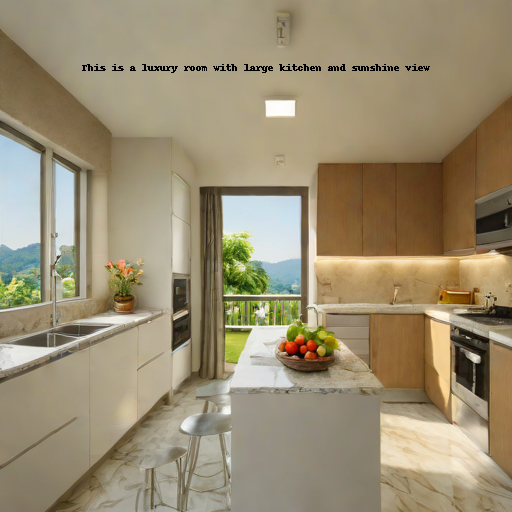

In [ ]:
prompt = "a luxury room with large kitchen and sunshine view"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")

# Add text to image
import numpy as np
from PIL import Image, ImageDraw, ImageFont
# Convert the generated image to a PIL Image
pil_img = images[0]

# Initialize the drawing context
draw = ImageDraw.Draw(pil_img)

# Use PIL's default font
font = ImageFont.load_default()


# Calculate the position to center the text
text = f"This is \t{prompt}"
text_width, text_height = draw.textsize(text, font=font)
image_width, image_height = pil_img.size
text_position = ((image_width - text_width) *0.5, (image_height - text_height) / 8)

# Add text to the image with the specified settings
draw.text(text_position, text, font=font, fill=(0, 0, 0))


# Display the modified image
media.show_images([pil_img])

# Save the modified image
pil_img.save("output_with_prompt.jpg")

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a photo of jewelry with diamond, another photo jewelry with gold; then  combine images
Seed:	1699348853657663794


""

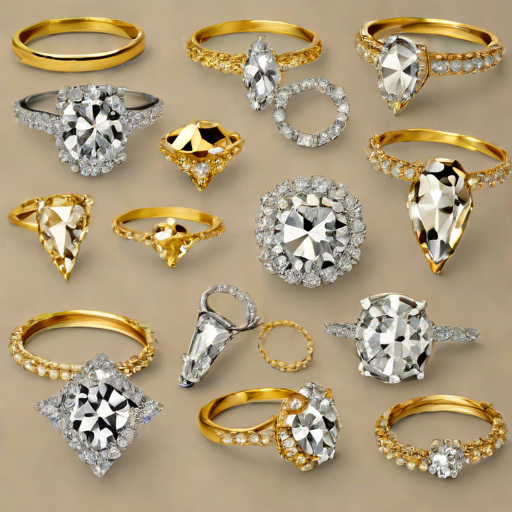

In [ ]:
prompt = "a photo of jewelry with diamond, another photo jewelry with gold; then  combine images"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	a photo of food menue
Seed:	6234635281701491947


""

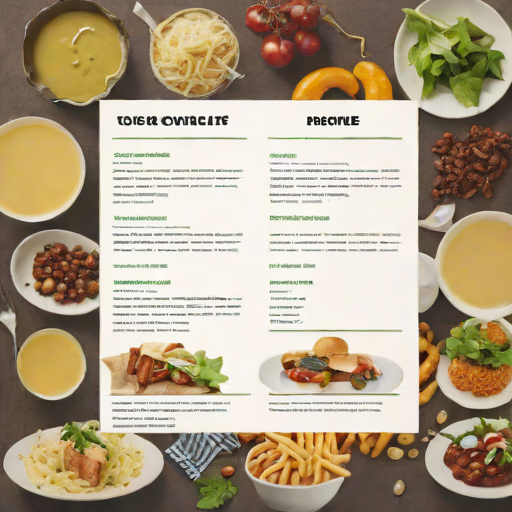

In [ ]:
prompt = "a photo of food menue"
seed = random.randint(0, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	my mom from heaven look at me
Seed:	7244939057501130181


""

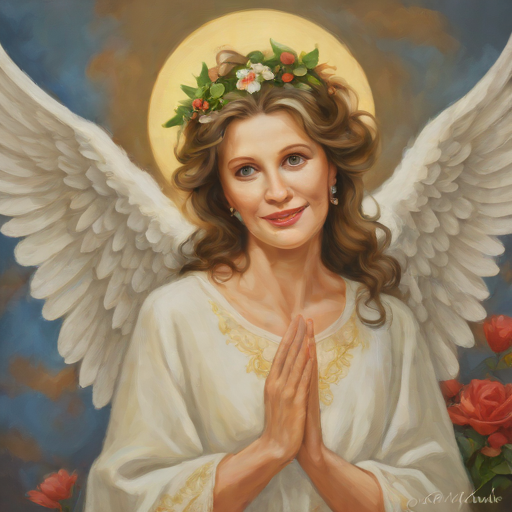

In [ ]:
prompt= "my mom from heaven look at me"
seed = random.randint(1, sys.maxsize)

num_inference_steps = 4

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")